In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('PUBG_Player_Statistics.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87898 entries, 0 to 87897
Columns: 152 entries, player_name to squad_DBNOs
dtypes: float64(83), int64(68), object(1)
memory usage: 101.6+ MB


In [3]:
data.head(5)

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077


In [4]:
concat = pd.concat([data.isnull().sum()],
          axis=1, 
          keys=['brakujące rekordy'])
print(concat.sum())

brakujące rekordy    0
dtype: int64


In [5]:
described_columns=['solo_RideDistance','solo_RoadKills','solo_KillDeathRatio','duo_KillDeathRatio','solo_RoundsPlayed','solo_WinRatio','solo_LongestKill','duo_LongestKill','duo_HealsPg','duo_KillsPg','solo_WinRatio','squad_WinRatio','duo_DBNOs','duo_Revives']
print('player_name count:',data.player_name.count(),'\n')
for i in described_columns:
    print(data[i].describe().apply(lambda x: '{:2.2f}'.format(x, 'f')),'\n')

player_name count: 87898 

count      87898.00
mean      102350.54
std       153340.27
min            0.00
25%        19039.47
50%        54898.48
75%       126471.66
max      4493014.24
Name: solo_RideDistance, dtype: object 

count    87898.00
mean         1.55
std          3.06
min          0.00
25%          0.00
50%          1.00
75%          2.00
max        230.00
Name: solo_RoadKills, dtype: object 

count    87898.00
mean         1.87
std          1.78
min          0.00
25%          1.03
50%          1.47
75%          2.14
max        100.00
Name: solo_KillDeathRatio, dtype: object 

count    87898.00
mean         1.47
std          1.35
min          0.00
25%          0.92
50%          1.26
75%          1.73
max         86.00
Name: duo_KillDeathRatio, dtype: object 

count    87898.00
mean        79.28
std         96.95
min          1.00
25%         17.00
50%         48.00
75%        105.00
max       1681.00
Name: solo_RoundsPlayed, dtype: object 

count    87898.00
mean         5

In [6]:
KolmogorovSmirnov = [data.solo_KillDeathRatio,data.duo_KillDeathRatio,data.duo_HealsPg,data.duo_KillsPg] #sprawdzanie czy to rozkład normalny, potrzebna informacja do zmiannych używanych w teście różnic
for i in KolmogorovSmirnov: #dla każdej stat oddzielnie
    a,b = st.kstest(i,'norm')
    print(i.name,'stat: {:2.1f}'.format(a),'pvalue:',b)

solo_KillDeathRatio stat: 0.7 pvalue: 0.0
duo_KillDeathRatio stat: 0.7 pvalue: 0.0
duo_HealsPg stat: 0.7 pvalue: 0.0
duo_KillsPg stat: 0.7 pvalue: 0.0


In [7]:
%matplotlib inline

## 1. Jaki jest związek między przebytą odległością przez gracza w pojeździe (solo_RideDistance), a ilością zabójstw poprzez potrącenie (solo_RoadKills) w trybie jednoosobowym?

In [8]:
correlation, pvalue = st.pearsonr(data['solo_RideDistance'].values, data['solo_RoadKills'].values)

print('Poziom istotności: ', pvalue)
print('Poziom korelacji:', '{:2.2f}'.format(correlation))

Poziom istotności:  0.0
Poziom korelacji: 0.71


## 7. Jaki jest związek między ilością wystąpień stanu DBNO (Down But Not Out) (duo_DBNOs) w trybie dwuosobowym, a ilością wskrzeszonych towarzyszy w trybie dwuosobowym (duo_Revives)?


In [9]:
correlation, pvalue = st.pearsonr(data['duo_DBNOs'].values, data['duo_Revives'].values)

print('Poziom istotności: ', pvalue)
print('Poziom korelacji:', '{:2.2f}'.format(correlation))

Poziom istotności:  0.0
Poziom korelacji: 0.88


## 3. Ze wszystkich graczy, którzy zagrali więcej niż 100 rund w trybie jednoosobowym (solo_RoundsPlayed), których dziesięciu (player_name) ma najwyższy procent wygranych w trybie jednoosobowym (solo_WinRatio)? W

In [10]:
over_100_rounds = data.loc[data.solo_RoundsPlayed > 100, ['player_name', 'solo_WinRatio']]
over_100_rounds = over_100_rounds.sort_values('solo_WinRatio', ascending=False)

top10_over_100_rounds = over_100_rounds.head(10)
print(top10_over_100_rounds)

            player_name  solo_WinRatio
752    The_Venom_Inside          36.64
1070         TGP_wahaha          31.82
287               mjyoh          29.13
146            denahuen          28.14
856               Scoom          27.43
545          IamChappie          27.10
25389           ckmahzy          26.63
1313           outc1der          26.50
3045            AinsNey          25.16
1080              benq5          24.43


<Figure size 432x288 with 0 Axes>

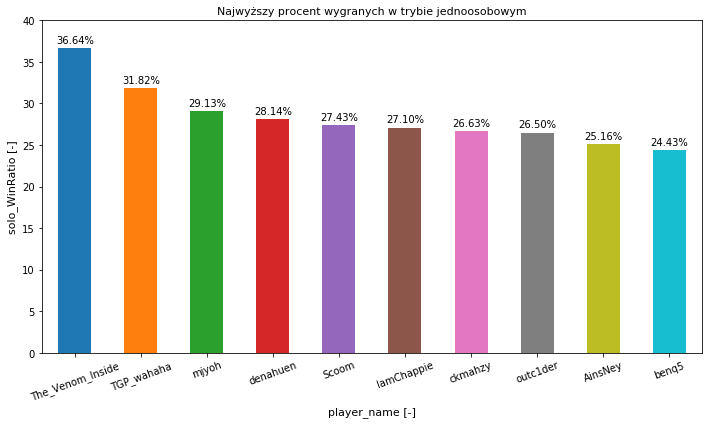

In [11]:
plt.figure();
ax = top10_over_100_rounds.plot(x='player_name', y='solo_WinRatio', kind='bar', fontsize=10, rot=20, legend=False, figsize=(10,6))
plt.xlabel('player_name [-]', fontsize=11)
plt.ylabel('solo_WinRatio [-]', fontsize=11)
plt.title('Najwyższy procent wygranych w trybie jednoosobowym', fontsize=11)
plt.ylim([0, 40])
for p in ax.patches:
    ax.annotate('{:2.2f}%'.format(p.get_height()), (p.get_x() - 0.03, p.get_height() + 0.6))
plt.tight_layout()

plt.savefig('top_10_over_100_rounds.png')

## 4. W którym z trybów (jednoosobowy i dwuosobowy) gracze osiągają najwyższy średni wynik długości śmiertelnego strzału (LongestKill) W

In [12]:
LongestKill_solo_vs_duo = data[['solo_LongestKill', 'duo_LongestKill']]
LongestKill_solo_vs_duo = LongestKill_solo_vs_duo.mean()
LongestKill_solo_vs_duo.apply(lambda x: '{:2.2f}'.format(x, 'f'))

solo_LongestKill    264.08
duo_LongestKill     320.41
dtype: object

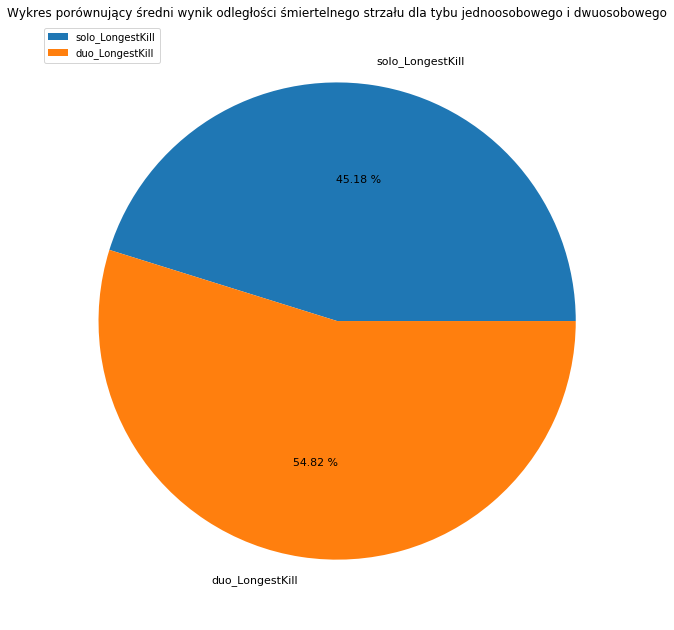

In [13]:
wykres = LongestKill_solo_vs_duo.plot.pie(autopct='%.2f % %', fontsize=11, figsize=(10, 10))
plt.legend(loc='upper left')
plt.title('Wykres porównujący średni wynik odległości śmiertelnego strzału dla tybu jednoosobowego i dwuosobowego')
plt.ylabel('')
plt.tight_layout()
plt.savefig('LongestKill_solo_vs_duo.png')

## 6. Jak wielu graczy, którzy mają współczynnik wygranych w trybie jednoosobowym poniżej 10 % (solo_WinRatio), mają współczynnik wygranych w trybie drużynowym powyżej 35% (squad_WinRatio). W

In [14]:
WinRatio_solo_squad = data.loc[data.solo_WinRatio < 10 , ['solo_WinRatio','squad_WinRatio']]
WinRatio_solo_squad = WinRatio_solo_squad.loc[WinRatio_solo_squad.squad_WinRatio > 35 , ['solo_WinRatio','squad_WinRatio']]
WinRatio_solo_squad = WinRatio_solo_squad.count()
WinRatio_solo_squad['Reszta'] = data.solo_WinRatio.count()- WinRatio_solo_squad.solo_WinRatio
del WinRatio_solo_squad['squad_WinRatio']
WinRatio_solo_squad = WinRatio_solo_squad.rename({'solo_WinRatio': 'WinRatio_solo_squad_count'})
print(WinRatio_solo_squad)

WinRatio_solo_squad_count      208
Reszta                       87690
dtype: int64


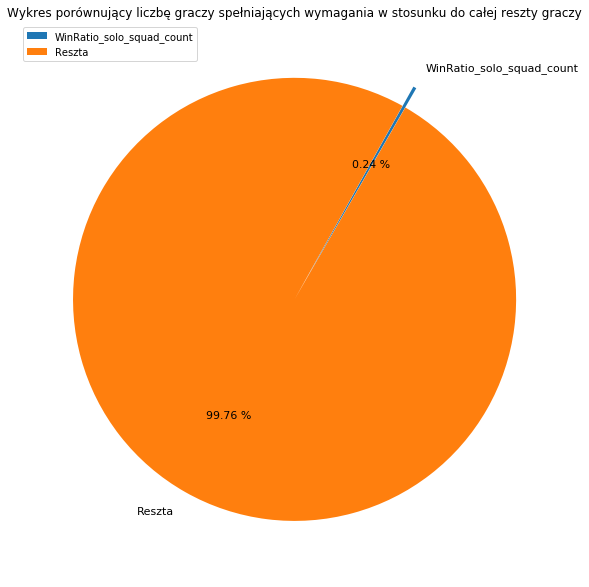

In [15]:
wykres = WinRatio_solo_squad.plot.pie(autopct='%.2f % %', fontsize=11, figsize=(9, 9), explode=[0.1,0], startangle=60)
plt.legend(loc='upper left')
plt.title('Wykres porównujący liczbę graczy spełniających wymagania w stosunku do całej reszty graczy')
plt.ylabel('')
plt.tight_layout()
plt.savefig('chosenones_vs_rest.png')

## 2. Czy jest różnica między wartością statystyki KDRatio w trybie solo (solo_KillDeathRatio), a w trybie duo?(duo_KillDeathRatio) W

In [16]:
statistic, pvalue = st.mannwhitneyu(data.solo_KillDeathRatio,data.duo_KillDeathRatio)
print('Poziom istotności: ', pvalue)
print('Poziom różnic:', statistic)

Poziom istotności:  0.0
Poziom różnic: 3172985334.5


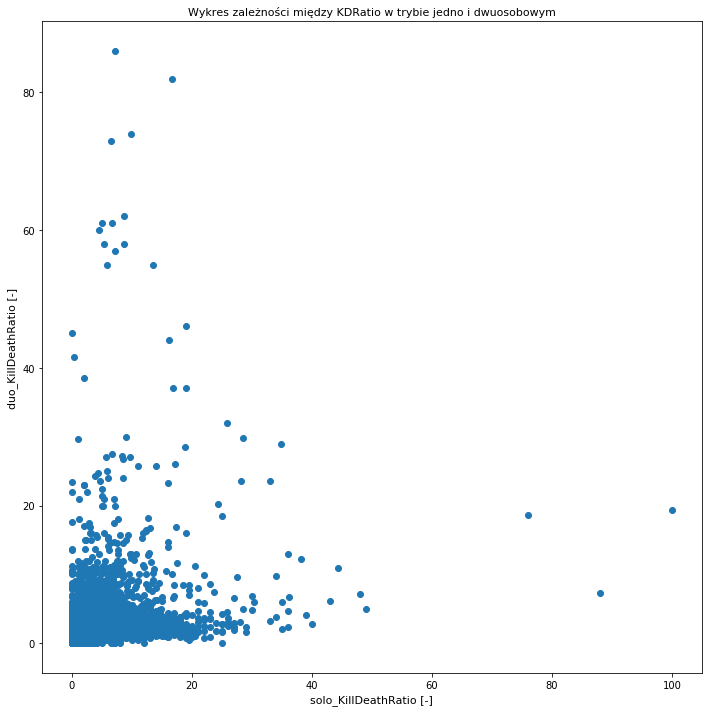

In [17]:
plt.figure(1 ,figsize=(10 ,10))
plt.tight_layout()
plt.xlabel('solo_KillDeathRatio [-]', fontsize=11)
plt.ylabel('duo_KillDeathRatio [-]', fontsize=11)
plt.title('Wykres zależności między KDRatio w trybie jedno i dwuosobowym', fontsize=11)
plt.scatter(data.solo_KillDeathRatio,data.duo_KillDeathRatio)
plt.tight_layout()
plt.savefig('KDRatio_solo_vs_duo.png')

## 5. Czy jest różnica między średnią liczbą uleczonych współtowarzyszy w trybie dwuosobowym (duo_HealsPg) a liczbą zabójstw w trybie dwuosobowym (duo_KillsPg)?

In [18]:
statistic, pvalue = st.mannwhitneyu(data.duo_HealsPg,data.duo_KillsPg)
print('Poziom istotności: ', pvalue)
print('Poziom różnic:', statistic)

Poziom istotności:  0.0
Poziom różnic: 2373493308.0
